# This is data analysis for coffee from all around the world.

The purpose of the study:
- Determine which countries produce best coffee quality. Best coffe quality is defined by highest score of total cup points.
- Determine which variables affect the quality of the coffe result. For example, processing methods, altitude, etc.
- Compare which variables (sensoric evaluations) with total cup points.

In [2]:
# Import libraries
import pandas as pd
# Import necessary libraries
import pandas as pd
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load CSV file and show the first 5 data
data_kopi=pd.read_csv('raw_data.csv')
data_kopi.head(5)


,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [4]:
#Showing general info of the data
data_kopi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     207 non-null    int64  
 1   Country of Origin      207 non-null    object 
 2   Farm Name              205 non-null    object 
 3   Lot Number             206 non-null    object 
 4   Mill                   204 non-null    object 
 5   ICO Number             75 non-null     object 
 6   Company                207 non-null    object 
 7   Altitude               206 non-null    object 
 8   Region                 205 non-null    object 
 9   Producer               206 non-null    object 
 10  Number of Bags         207 non-null    int64  
 11  Bag Weight             207 non-null    object 
 12  In-Country Partner     207 non-null    object 
 13  Harvest Year           207 non-null    object 
 14  Grading Date           207 non-null    object 
 15  Owner 

### Insights from data: 
- The max data number is 207 with total columns 40, therefore variables with less than 207 data, have some missing values. For example, Farm Name has 2 missing data.
- The data type are mostly numeric and some of them are texts.

In [5]:
data_kopi.columns

Index(['ID', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [6]:
data_kopi.drop(columns=['Lot Number', 'Mill', 'ICO Number','In-Country Partner', 'Harvest Year','Number of Bags', 'Bag Weight',
       'Grading Date', 'Owner', 'Status', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact','Sweetness','Clean Cup'],axis=1,inplace=True)
data_kopi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    207 non-null    int64  
 1   Country of Origin     207 non-null    object 
 2   Farm Name             205 non-null    object 
 3   Company               207 non-null    object 
 4   Altitude              206 non-null    object 
 5   Region                205 non-null    object 
 6   Producer              206 non-null    object 
 7   Variety               201 non-null    object 
 8   Processing Method     202 non-null    object 
 9   Aroma                 207 non-null    float64
 10  Flavor                207 non-null    float64
 11  Aftertaste            207 non-null    float64
 12  Acidity               207 non-null    float64
 13  Body                  207 non-null    float64
 14  Balance               207 non-null    float64
 15  Uniformity            2

### Since the number of missing values is little, I decided to use the dropna function.

In [7]:
data_kopi_cleaned=data_kopi.dropna()
data_kopi_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    196 non-null    int64  
 1   Country of Origin     196 non-null    object 
 2   Farm Name             196 non-null    object 
 3   Company               196 non-null    object 
 4   Altitude              196 non-null    object 
 5   Region                196 non-null    object 
 6   Producer              196 non-null    object 
 7   Variety               196 non-null    object 
 8   Processing Method     196 non-null    object 
 9   Aroma                 196 non-null    float64
 10  Flavor                196 non-null    float64
 11  Aftertaste            196 non-null    float64
 12  Acidity               196 non-null    float64
 13  Body                  196 non-null    float64
 14  Balance               196 non-null    float64
 15  Uniformity            196 no

In [8]:
def change_col_names(df):
    prev_col_names=df.columns.tolist()#put the col name into the list
    new_col_names=[name.lower().replace('-','_').replace(' ','_') for name in prev_col_names]
    return new_col_names

In [9]:
new_col_names=change_col_names(data_kopi_cleaned)
data_kopi_cleaned.columns=new_col_names
data_kopi_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    196 non-null    int64  
 1   country_of_origin     196 non-null    object 
 2   farm_name             196 non-null    object 
 3   company               196 non-null    object 
 4   altitude              196 non-null    object 
 5   region                196 non-null    object 
 6   producer              196 non-null    object 
 7   variety               196 non-null    object 
 8   processing_method     196 non-null    object 
 9   aroma                 196 non-null    float64
 10  flavor                196 non-null    float64
 11  aftertaste            196 non-null    float64
 12  acidity               196 non-null    float64
 13  body                  196 non-null    float64
 14  balance               196 non-null    float64
 15  uniformity            196 no

In [10]:
data_kopi_cleaned['altitude'].unique()

array(['1700-1930', '1200', '1300', '1900', '1850-2100', '1668', '1250',
       '1400-1700', '1800-2200', '2000', '1900-2000', '1850', '1100',
       '1900-2100', '1570-1600', '850', '1500-1700', '1060', '600',
       '150-250', '668', '1950', '2150 - 2350', '1700', '650',
       '1600-1900', '300-500', '1000', '800', '1905', '1600', '4700',
       '350-400', '230', '1750', '1654', '1400', '4895', '200-300', '700',
       '1350', '1450', '520', '1368', '1943', '400', '1300-1400', '2361',
       '1500', '2100', '1250-1350', '150', '1500-1600', '1800',
       '1600-1750', '4895 A 5650', '400-600', '200-400', '1470',
       '250-400', '250-300', '1200 - 1580', '1400 - 1900', '1280-1325',
       '300', '750', '1300-1500', '950', '1100-1200', '1390', '340',
       '1200 - 1300', '1650', '1280', '900', '165', '465', '640', '1340',
       '139', '1200-1350', '1040', '140', '1500-1950', '460', '500',
       '800-1200', '1200~1600', '5400', '900-1000', '1574', '435',
       '600-800', '1300-180

In [11]:
def get_average_altitude(altitude):
    """
    The function will convert all data into string form first to ensure consistency of data type in the column. After that, it will calculate the averages.
    Finally, it will return the final calculation of averaged altitude values or altitude data conversion into float.
    """
    altitude = str(altitude)
    # conditions for calculating averages
    if '-' in altitude:
        start_alt, end_alt = map(int, altitude.split('-'))
        return (start_alt + end_alt) / 2
    elif '~' in altitude:
        start_alt, end_alt = map(int, altitude.split('~'))
        return (start_alt + end_alt) / 2
    elif 'A' in altitude:
        start_alt, end_alt = map(int, altitude.split('A'))
        return (start_alt + end_alt) / 2
    else:
        # if there is only a single number in the string, just convert into float
        return float(altitude)

In [12]:
data_kopi_cleaned['color'].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

In [13]:
def color_value_converter(dataset):
    """
    The function will replace some miss-spelled words such as 'yello-green' and browish-green.
    Then, the function will also changes other forms of yellow-green ('yellow green', and 'yellow- green') into yellow-green
    for consistency.
    """
    # for typo color yellow-green
    # 'yello-green','yellow green', and 'yellow- green'
    dataset['color'] = dataset['color'].replace('yello-green','yellow-green')
    dataset['color'] = dataset['color'].replace('yellow green','yellow-green')
    dataset['color'] = dataset['color'].replace('yellow- green','yellow-green')

    # typo browish-green
    dataset['color'] = dataset['color'].replace('browish-green','brownish-green')
    return dataset

In [14]:
data_kopi_cleaned['variety'] = data_kopi_cleaned['variety'].str.replace('unknown','no_record')
data_kopi_cleaned['variety'] = data_kopi_cleaned['variety'].str.replace('unknow','no_record')

C:\Users\Sandra\AppData\Local\Temp\ipykernel_19084\4071047301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kopi_cleaned['variety'] = data_kopi_cleaned['variety'].str.replace('unknown','no_record')
C:\Users\Sandra\AppData\Local\Temp\ipykernel_19084\4071047301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kopi_cleaned['variety'] = data_kopi_cleaned['variety'].str.replace('unknow','no_record')


In [15]:
# Apply the function to the 'altitude' column, strip the extra whitespaces first
data_kopi_cleaned['altitude'] = data_kopi_cleaned['altitude'].str.strip()
data_kopi_cleaned['altitude'] = data_kopi_cleaned['altitude'].apply(get_average_altitude)
# drop the original altitude column
data_kopi_cleaned.rename(columns={'altitude':'average_altitude_m'},inplace = True)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_19084\3696209348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kopi_cleaned['altitude'] = data_kopi_cleaned['altitude'].str.strip()
C:\Users\Sandra\AppData\Local\Temp\ipykernel_19084\3696209348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kopi_cleaned['altitude'] = data_kopi_cleaned['altitude'].apply(get_average_altitude)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_19084\3696209348.py:5: SettingWithCopyWarning: 
A value is trying to be set

In [16]:
data_kopi_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    196 non-null    int64  
 1   country_of_origin     196 non-null    object 
 2   farm_name             196 non-null    object 
 3   company               196 non-null    object 
 4   average_altitude_m    196 non-null    float64
 5   region                196 non-null    object 
 6   producer              196 non-null    object 
 7   variety               196 non-null    object 
 8   processing_method     196 non-null    object 
 9   aroma                 196 non-null    float64
 10  flavor                196 non-null    float64
 11  aftertaste            196 non-null    float64
 12  acidity               196 non-null    float64
 13  body                  196 non-null    float64
 14  balance               196 non-null    float64
 15  uniformity            196 no

# Visualization

In [17]:
def percentage_calculator(data):
  percentage_keeper = []
  total = sum(data)
  for i in range(len(data)):
    calculate = round((data[i]/total) * 100,2)
    percentage_keeper.append(calculate)
  return percentage_keeper

In [53]:
# create a separate table to keep original table
# create a dataframe containing per processing_method and total number of processing method
# use size to count the number of each element (processing_method)
pie_df = data_kopi_cleaned['processing_method'].value_counts().reset_index(name='countmethod')
pie_df

,processing_method,countmethod
0,Washed / Wet,121
1,Natural / Dry,45
2,Pulped natural / honey,23
3,Double Anaerobic Washed,1
4,Semi Washed,1
5,"Honey,Mossto",1
6,Double Carbonic Maceration / Natural,1
7,Wet Hulling,1
8,Anaerobico 1000h,1
9,SEMI-LAVADO,1


In [19]:
data_kopi_cleaned['processing_method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey',
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

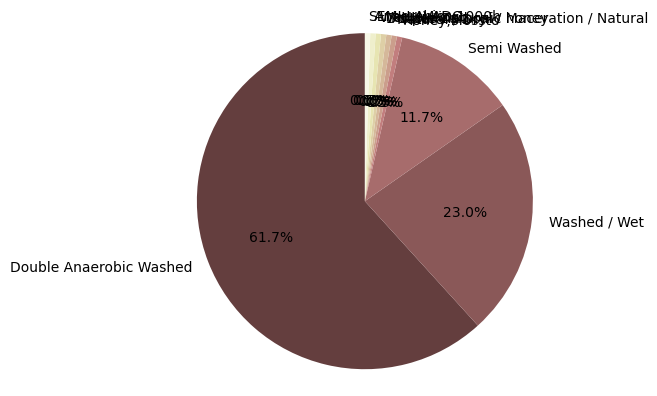

In [54]:
# define the label and proportion sizes
label_name = ['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey',
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO']
proportion_sizes = percentage_calculator(pie_df['countmethod'])

# Using a pink color palette
colors = sns.color_palette('pink', len(label_name))

# Plotting the pie chart with specified colors
plt.pie(proportion_sizes, labels=label_name, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# show pie chart
plt.show()

In [55]:
pie_df['proportion_sizes']=proportion_sizes
pie_df

,processing_method,countmethod,proportion_sizes
0,Washed / Wet,121,61.73
1,Natural / Dry,45,22.96
2,Pulped natural / honey,23,11.73
3,Double Anaerobic Washed,1,0.51
4,Semi Washed,1,0.51
5,"Honey,Mossto",1,0.51
6,Double Carbonic Maceration / Natural,1,0.51
7,Wet Hulling,1,0.51
8,Anaerobico 1000h,1,0.51
9,SEMI-LAVADO,1,0.51


In [21]:
data_kopi_cleaned['country_of_origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Peru', 'Brazil',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Indonesia', 'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

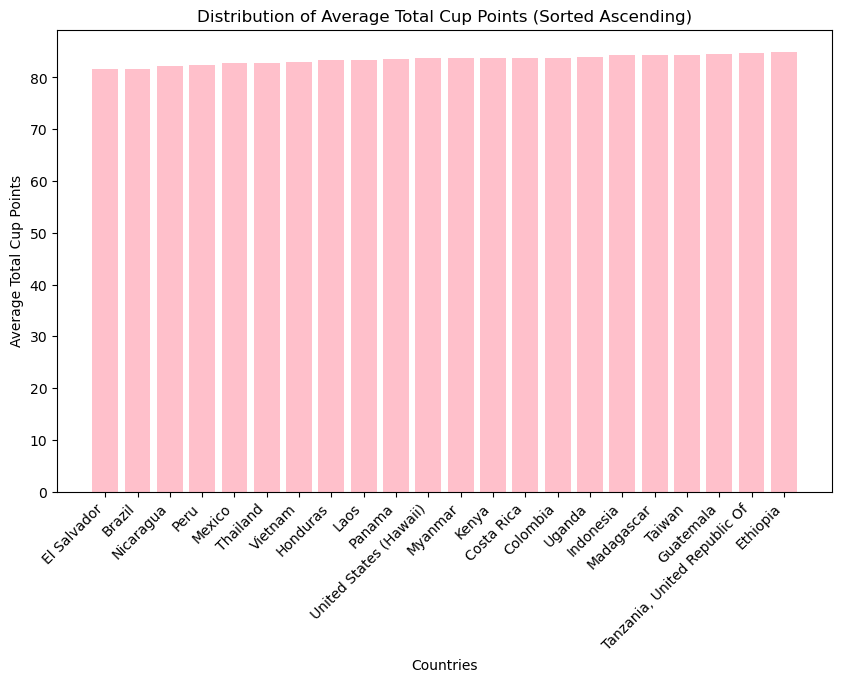

In [22]:
# # Grouping and calculating average total cup points
# avg_df = data_kopi_cleaned.groupby('country_of_origin')['total_cup_points'].mean().reset_index(name='avg_total_cp')

# # Sorting data based on average total cup points in ascending order
# sorted_data = avg_df.sort_values(by='avg_total_cp')

# # Plotting a sorted bar graph in ascending order
# plt.figure(figsize=(10, 6))
# plt.bar(sorted_data['country_of_origin'], sorted_data['avg_total_cp'], color='pink')

# # Adding labels and title
# plt.xlabel('Countries')
# plt.ylabel('Average Total Cup Points')
# plt.title('Distribution of Average Total Cup Points (Sorted Ascending)')

# # Rotating x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Display the sorted bar graph
# plt.show()

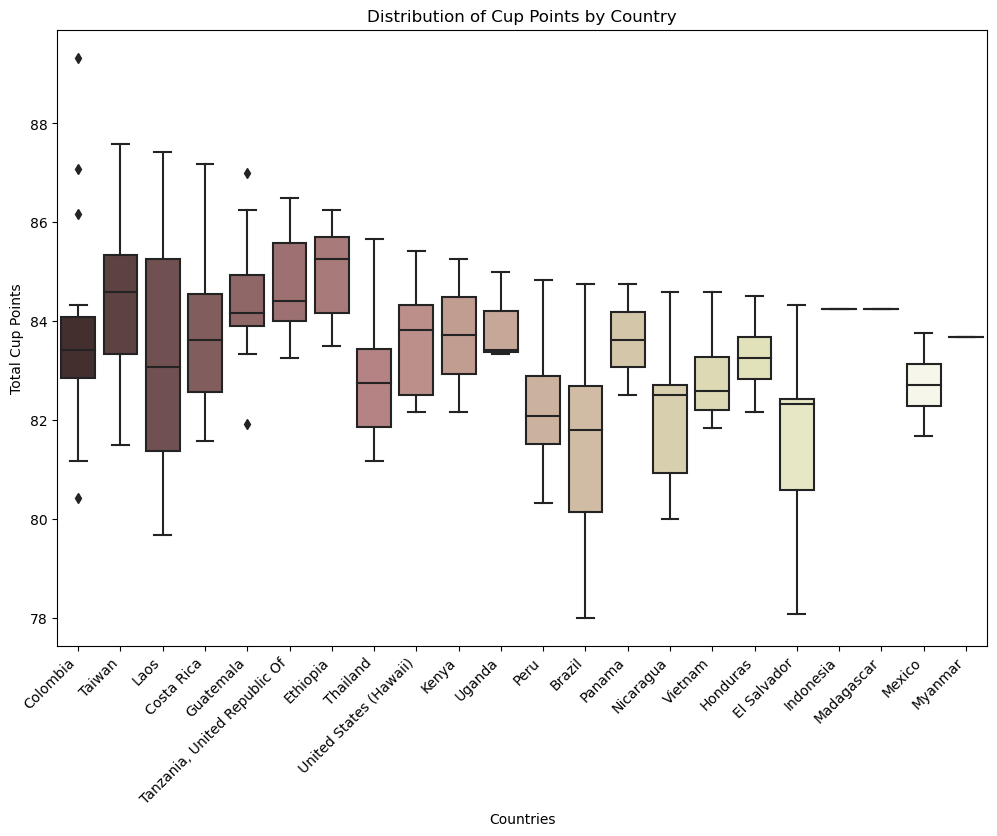

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_kopi_cleaned' is your DataFrame
# and 'country_of_origin' and 'total_cup_points' are the relevant columns

# Creating a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='country_of_origin', y='total_cup_points', data=data_kopi_cleaned, palette='pink')

# Adding labels and title
plt.xlabel('Countries')
plt.ylabel('Total Cup Points')
plt.title('Distribution of Cup Points by Country')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the box plot
plt.show()

In [24]:
data_kopi_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    196 non-null    int64  
 1   country_of_origin     196 non-null    object 
 2   farm_name             196 non-null    object 
 3   company               196 non-null    object 
 4   average_altitude_m    196 non-null    float64
 5   region                196 non-null    object 
 6   producer              196 non-null    object 
 7   variety               196 non-null    object 
 8   processing_method     196 non-null    object 
 9   aroma                 196 non-null    float64
 10  flavor                196 non-null    float64
 11  aftertaste            196 non-null    float64
 12  acidity               196 non-null    float64
 13  body                  196 non-null    float64
 14  balance               196 non-null    float64
 15  uniformity            196 no

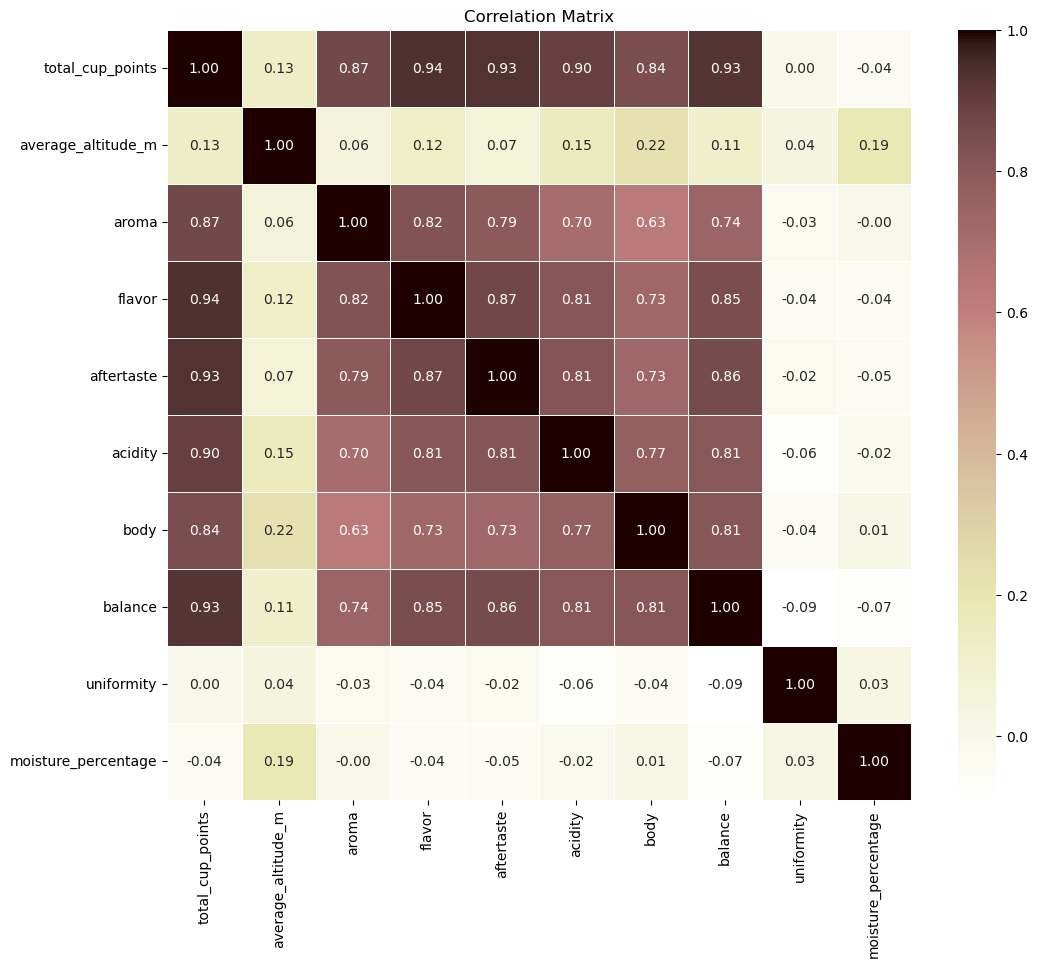

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_kopi_cleaned' is your DataFrame with relevant columns
# Fill missing values and convert data types
# data_kopi_cleaned['clean_cup'] = pd.to_numeric(data_kopi_cleaned['clean_cup'], errors='coerce')
# data_kopi_cleaned['sweetness'] = pd.to_numeric(data_kopi_cleaned['sweetness'], errors='coerce')

# Selecting relevant numerical columns for the correlation matrix
numerical_columns = ['total_cup_points','average_altitude_m', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'moisture_percentage']

# Calculating the correlation matrix
correlation_matrix = data_kopi_cleaned[numerical_columns].corr()

# Creating a heatmap for the correlation matrix with pink tones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='pink_r', fmt=".2f", linewidths=0.5)

# Adding title
plt.title('Correlation Matrix')

# Display the correlation matrix heatmap
plt.show()

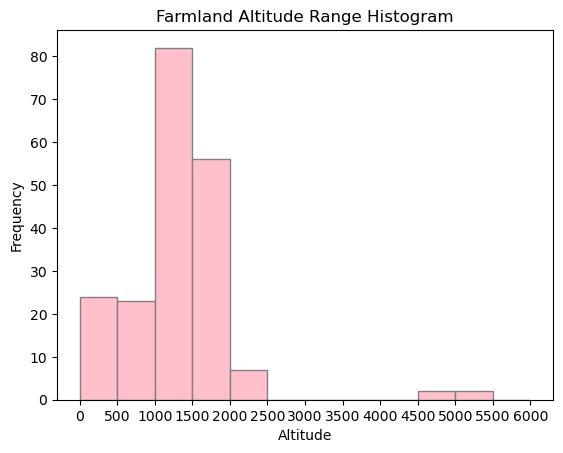

In [47]:
import matplotlib.pyplot as plt

# Sample altitude data
altitude_data = data_kopi_cleaned['average_altitude_m']

# Define the maximum altitude
max_altitude = 6000

# Define the interval for altitude ranges
interval = 500

# Generate altitude ranges using a for loop
altitude_ranges = list(range(0, max_altitude + interval, interval))

# Create histogram
plt.hist(altitude_data, bins=altitude_ranges, edgecolor='grey',color='pink')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Farmland Altitude Range Histogram')
plt.xticks(altitude_ranges)
plt.show()

In [ ]:
### Save data kopi clenaned to csv file

In [48]:
data_kopi_cleaned.to_csv('data_kopi_cleaned.csv',index=False)

In [49]:
import pandas as pd

# Assuming data_kopi_cleaned is your DataFrame and numerical_columns contains numerical variables
correlation_matrix = data_kopi_cleaned[numerical_columns].corr()

# Save correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')


In [56]:
pie_df.to_csv('pie.csv',index=False)